In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
df_games = pd.read_csv('csv/game.csv', parse_dates=['game_date'])

In [120]:
#RESPOSTA PERGUNTA 1 
#1. HOUVE MUDANÇA NO JEITO DE SER JOGADO? HOUVE AUMENTO EM ALGUMA ESTATISTICA ESPECÍFICA AO LONGO DO TEMPO?

In [121]:
df_games.tail()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,L,240,34.0,...,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,L,240,35.0,...,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12,DEN vs. MIA,W,240,38.0,...,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star
65697,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All Star


In [122]:
#ver os tipos de jogo que tem no banco de dados e escolher apenas os oficiais (regular e playoffs)
df_games['season_type'].value_counts()
df_games = df_games[df_games['season_type'].isin(['Regular Season', 'Playoffs'])]

In [123]:
#filtrar apenas as colunas que interessam
df_games = df_games.loc[:, ['game_date', 'pts_home', 'pts_away', 'fg3m_home', 'fg3a_home', 'fg3m_away', 'fg3a_away']]
df_games.head()

,game_date,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away
0,1946-11-01,66.0,68.0,NaN,NaN,NaN,NaN
1,1946-11-02,56.0,51.0,NaN,NaN,NaN,NaN
2,1946-11-02,59.0,53.0,NaN,NaN,NaN,NaN
3,1946-11-02,63.0,47.0,NaN,NaN,NaN,NaN
4,1946-11-02,33.0,50.0,NaN,NaN,NaN,NaN


In [124]:
#criar uma coluna de ano do jogo e remover a coluna de data
df_games.insert(0, 'game_year', df_games['game_date'].dt.year)
df_games.drop(columns=['game_date'], inplace=True)  
df_games.head()

,game_year,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away
0,1946,66.0,68.0,NaN,NaN,NaN,NaN
1,1946,56.0,51.0,NaN,NaN,NaN,NaN
2,1946,59.0,53.0,NaN,NaN,NaN,NaN
3,1946,63.0,47.0,NaN,NaN,NaN,NaN
4,1946,33.0,50.0,NaN,NaN,NaN,NaN


In [125]:
#criar uma coluna de pontos totais
df_games['pts_total'] = df_games['pts_home'] + df_games['pts_away']
#dropar as colunas de pontos dos times
df_games.drop(columns=['pts_home', 'pts_away'], inplace=True)
df_games.head()

,game_year,fg3m_home,fg3a_home,fg3m_away,fg3a_away,pts_total
0,1946,NaN,NaN,NaN,NaN,134.0
1,1946,NaN,NaN,NaN,NaN,107.0
2,1946,NaN,NaN,NaN,NaN,112.0
3,1946,NaN,NaN,NaN,NaN,110.0
4,1946,NaN,NaN,NaN,NaN,83.0


In [126]:
#criar coluna de total de 3 pontos tentado e convertido pelos 2 times ao em vez de separar
df_games['fg3m_total'] = df_games['fg3m_home'] + df_games['fg3m_away']
df_games['fg3a_total'] = df_games['fg3a_home'] + df_games['fg3a_away']
#dropar as colunas de 3 pontos dos times
df_games.drop(columns=['fg3m_home', 'fg3a_home', 'fg3m_away', 'fg3a_away'], inplace=True)
df_games.head()

,game_year,pts_total,fg3m_total,fg3a_total
0,1946,134.0,NaN,NaN
1,1946,107.0,NaN,NaN
2,1946,112.0,NaN,NaN
3,1946,110.0,NaN,NaN
4,1946,83.0,NaN,NaN


In [127]:
#adicionar porcentagem de 3 pontos feitos sobre tentados
df_games['fg3_pct'] = df_games['fg3m_total'] / df_games['fg3a_total']
df_games.tail()

,game_year,pts_total,fg3m_total,fg3a_total,fg3_pct
65691,2023,197.0,21.0,66.0,0.318182
65692,2023,219.0,28.0,63.0,0.444444
65693,2023,203.0,16.0,53.0,0.301887
65694,2023,203.0,22.0,53.0,0.415094
65695,2023,183.0,14.0,63.0,0.222222


In [128]:
df_games.sort_values('fg3_pct', ascending=False)

,game_year,pts_total,fg3m_total,fg3a_total,fg3_pct
18710,1985,231.0,2.0,0.0,inf
21550,1988,196.0,4.0,4.0,1.0
21371,1987,196.0,4.0,4.0,1.0
19696,1986,235.0,2.0,2.0,1.0
19791,1986,267.0,3.0,3.0,1.0
...,...,...,...,...,...
20260,1986,222.0,0.0,0.0,NaN
20475,1986,222.0,0.0,0.0,NaN
20556,1987,194.0,0.0,0.0,NaN
21927,1988,209.0,0.0,0.0,NaN


In [129]:
#dropar colunas invalidas, como por exemplo com o numero de cestas tentadas inferiorao de cestas feitas
df_games = df_games.drop(df_games.query('fg3a_total < fg3m_total').index)


In [130]:
df_games.sort_values('fg3_pct', ascending=False)


,game_year,pts_total,fg3m_total,fg3a_total,fg3_pct
15776,1982,211.0,3.0,3.0,1.0
19137,1985,231.0,1.0,1.0,1.0
20032,1986,225.0,1.0,1.0,1.0
20030,1986,239.0,2.0,2.0,1.0
21550,1988,196.0,4.0,4.0,1.0
...,...,...,...,...,...
20260,1986,222.0,0.0,0.0,NaN
20475,1986,222.0,0.0,0.0,NaN
20556,1987,194.0,0.0,0.0,NaN
21927,1988,209.0,0.0,0.0,NaN


Text(0.5, 1.0, 'Média de pontos por ano')

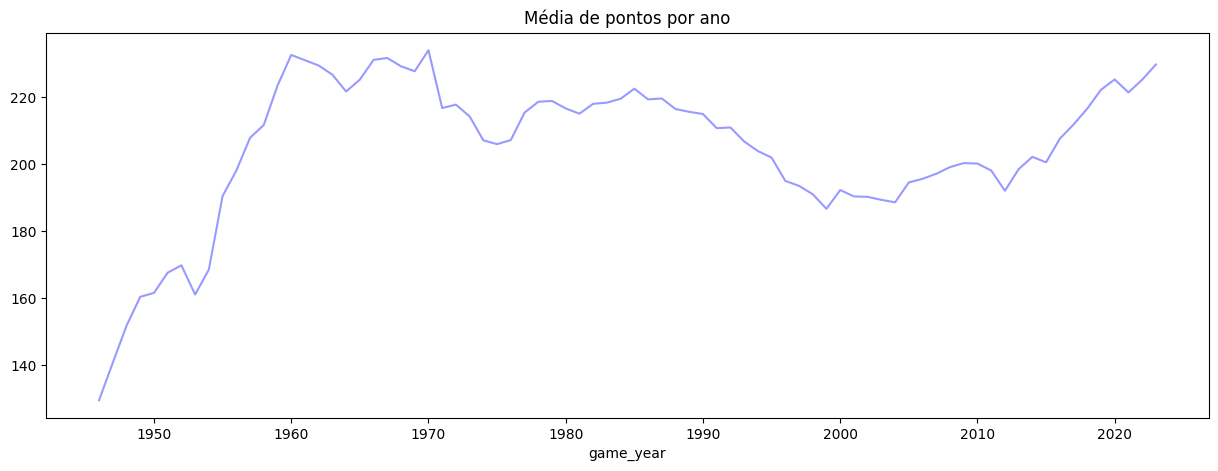

In [131]:
#agrupar por ano e pegar a média de pontos e 3 pontos tentados e convertidos
df_anos = df_games.groupby('game_year')['pts_total'].mean()
df_anos.plot(kind='line', figsize=(15, 5), color='blue', alpha=0.4)
plt.title('Média de pontos por ano')


In [ ]:
#dropamos os anos que nao tem dados de 3 pts (foi inventado em 1979/80)
df_3pts = df_games.dropna(subset = ['fg3m_total', 'fg3a_total', 'fg3_pct'])

In [133]:
df_3pts.head()

,game_year,pts_total,fg3m_total,fg3a_total,fg3_pct
14165,1980,211.0,0.0,2.0,0.0
14166,1980,211.0,0.0,2.0,0.0
14167,1980,212.0,1.0,5.0,0.2
14169,1980,211.0,0.0,3.0,0.0
14170,1980,230.0,0.0,8.0,0.0


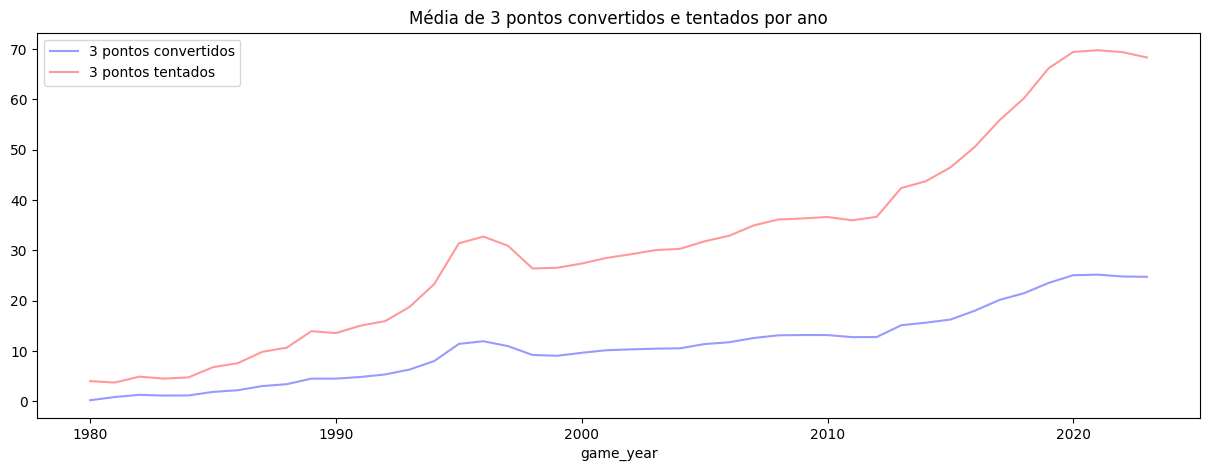

In [135]:
df_3made = df_3pts.groupby('game_year')['fg3m_total'].mean()
df_3attempt = df_3pts.groupby('game_year')['fg3a_total'].mean()
df_3made.plot(kind='line', figsize=(15, 5), color='blue', alpha=0.4)
df_3attempt.plot(kind='line', figsize=(15, 5), color='red', alpha=0.4)
plt.title('Média de 3 pontos convertidos e tentados por ano')
plt.legend(['3 pontos convertidos', '3 pontos tentados'])

Text(0.5, 1.0, 'Média de porcentagem de 3 pontos convertidos por ano')

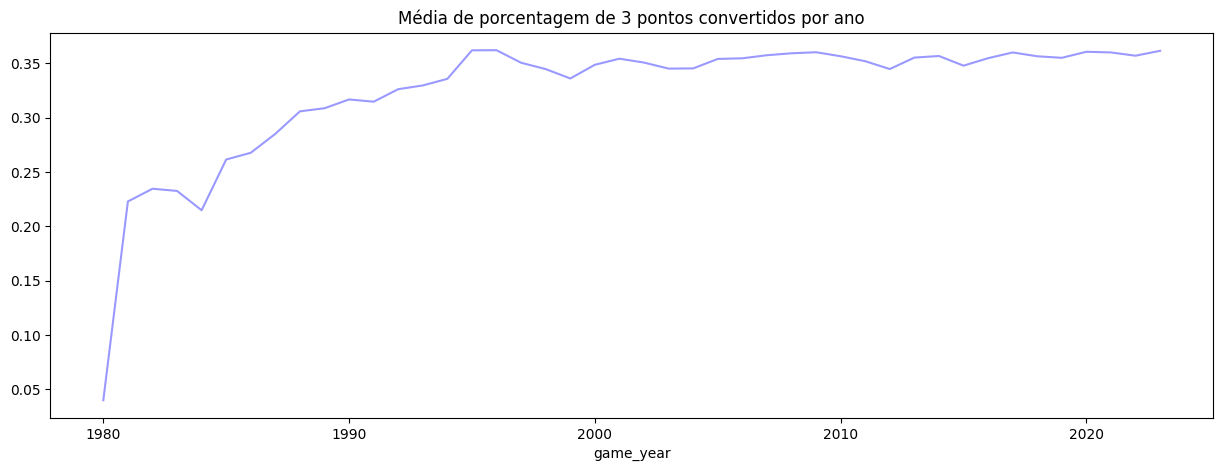

In [136]:
df_3ptspct = df_3pts.groupby('game_year')['fg3_pct'].mean()
df_3ptspct.plot(kind='line', figsize=(15, 5), color='blue', alpha=0.4)
plt.title('Média de porcentagem de 3 pontos convertidos por ano')